In [10]:
import praw

# Set up PRAW credentials
client_id = "mlXe7IEjDHGXD0DDYRcWnw"
client_secret = "TzQPQ_xfeFYAH2BwDZAz6nJwrTnuuA"
user_agent = "sentiment/1.0"


# Authenticate with Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent,
 )

# get the 10 most popular subreddits
subreddits = reddit.subreddits.popular(limit=5)

# create an empty dictionary to store the posts
posts_dict = {}

# iterate over the popular subreddits and get their hot posts
for subreddit in subreddits:
    posts = subreddit.hot(limit=5)
    posts_list = []
    for post in posts:
        posts_list.append(post.title)
    # add the list of posts to the dictionary with the subreddit name as the key
    posts_dict[subreddit.display_name] = posts_list

# print the dictionary of posts
print(posts_dict)

{'Home': ['How to fix stair/wall gap?', 'What is this plug?', 'Ideas for curb appeal?', 'Hole in concrete floor', 'How to fix hardwood floor paint'], 'AskReddit': ['What weird flex you proud of?', 'What are the best songs that tell a story?', 'If you could remove a law, which one would get the boot?', 'What screams “I’m a terrible fucking parent”?', 'What was the biggest lie you believed?'], 'mildlyinfuriating': ['Jkfl Redddit Meta Posts', 'Bestof2022! Prize winners! They won prises! For the Besof! of last yer!', 'The way my wife cuts tomatoes', 'Four spots. FOUR!', 'When you buy an 8 foot 2x4 and get it home...'], 'facepalm': ['Nashville, Tennessee Christian School refused to allow a female student to enter prom because she was wearing a suit.', 'Professional deaf track team lands in San Francisco and is welcomed by this', "Who's gonna tell them?", 'Only way to cover a mistake is with another mistake', 'Be quick to listen and slow to speak..'], 'AmItheAsshole': ['AITA Monthly Open For

In [ ]:
import re
def clean_text(text):
    # remove words starting with @ symbol
    text = re.sub(r'@\w+\s?', '', text)
    
    # remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # remove unnecessary whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [ ]:
clean_reddit_data = {}

for i in posts_dict.items():
    clean_reddit_data[i[0]] = []
    for j in i[1]:
        clean_reddit_data[i[0]].append(clean_text(j))

In [ ]:
clean_reddit_data

{'Home': ['i did a thing',
  'the home builder egde homes assured the city the house was safe to live in',
  'best way to clean patio',
  'theres a crack in my stone fence should i call someone to fix it or am i overthinking it',
  'i bought this house a couple years ago this ventfan thing is a complete mystery any ideas'],
 'AskReddit': ['what is the prettiest song you ever heard in your life',
  'what computer feature dont most people know about',
  'what insult have your parents said that is stuck in your head as an adult',
  'what hobby is an immediate red flag',
  'whats a kink that you started joking about that turned into one of your actual kinks'],
 'mildlyinfuriating': ['jkfl redddit meta posts',
  'bestof prize winners they won prises for the besof of last yer',
  'guy in front of my refused to take off his hat after i told him it was blocking my view',
  'teens charged with misdemeanor in stolen vehicle crash that killed monthold a google news query on the childs name return

In [ ]:
from transformers import AutoTokenizer
tokenizer_global = None
def tokenize_data(text, model_name):
    # load pre-trained tokenizer
    global tokenizer_global
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer_global = tokenizer
    # tokenize each sentence in clean_text column
    tokens = tokenizer.encode(text, add_special_tokens=True)
    return tokens
model_name = 'bert-base-uncased'

tokenized_data = {}

for i in clean_reddit_data.items():
    tokenized_data[i[0]] = []
    for j in i[1]:
        tokenized_data[i[0]].append(tokenize_data(j, model_name))


In [ ]:
tokenized_data

{'Home': [[101, 1045, 2106, 1037, 2518, 102],
  [101,
   1996,
   2188,
   12508,
   1041,
   2290,
   3207,
   5014,
   8916,
   1996,
   2103,
   1996,
   2160,
   2001,
   3647,
   2000,
   2444,
   1999,
   102],
  [101, 2190, 2126, 2000, 4550, 19404, 102],
  [101,
   2045,
   2015,
   1037,
   8579,
   1999,
   2026,
   2962,
   8638,
   2323,
   1045,
   2655,
   2619,
   2000,
   8081,
   2009,
   2030,
   2572,
   1045,
   2058,
   15222,
   8950,
   2075,
   2009,
   102],
  [101,
   1045,
   4149,
   2023,
   2160,
   1037,
   3232,
   2086,
   3283,
   2023,
   18834,
   15143,
   2518,
   2003,
   1037,
   3143,
   6547,
   2151,
   4784,
   102]],
 'AskReddit': [[101,
   2054,
   2003,
   1996,
   3653,
   6916,
   4355,
   2299,
   2017,
   2412,
   2657,
   1999,
   2115,
   2166,
   102],
  [101, 2054, 3274, 3444, 2123, 2102, 2087, 2111, 2113, 2055, 102],
  [101,
   2054,
   15301,
   2031,
   2115,
   3008,
   2056,
   2008,
   2003,
   5881,
   1999,
   2115,
   2132,

In [ ]:
import numpy as np

def pad_tokens(data, max_length):
    print("naman")
    """
    Pads the tokenized sentences in the 'tokens' column of the input DataFrame to a fixed length.
    
    Args:
        data (pandas.DataFrame): The input DataFrame with the 'tokens' column containing the tokenized sentences.
        max_length (int): The maximum length of the padded sentences.
    
    Returns:
        np.ndarray: A 2D NumPy array of shape (num_sentences, max_length) containing the padded token IDs.
    """
    # Get the tokenized sentences as a list
 
    
    # Initialize an empty array to hold the padded token IDs
    padded_tokens = np.zeros((len(data), max_length))
    print(padded_data)
    # Pad each sentence with zeros to the desired length and store in the padded_tokens array
    for i, tokens in enumerate(data):
        padded_tokens[i, :min(len(tokens), max_length)] = tokens[:max_length]
    
    return padded_tokens

padded_data = {}

for i in tokenized_data.items():

    padded_data[i[0]] = (pad_tokens(i[1], 72))



naman
{}
naman
{'Home': array([[  101.,  1045.,  2106.,  1037.,  2518.,   102.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [  101.,  1996.,  2188., 12508.,  1041.,  2290.,  3207.,  5014.,
         8916.,  1996.,  2103.,  1996.,  2160.,  2001.,  3647.,  2000.,
         2444.,  1999.,   102.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("whole_tweet_5_epochs_kaggle.h5")

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def predict_sentiment(model, tokenizer, sentence):
    # Clean and preprocess the input sentence
    clean_sentence = clean_text(sentence)
    tokenized_sentence = tokenizer.encode(clean_sentence, add_special_tokens=True)
    padded_sentence = pad_sequences([tokenized_sentence], maxlen=72, dtype="long", 
                                     value=0, truncating="post", padding="post")
    # Predict the sentiment label
    predicted_label = model.predict(padded_sentence, verbose=0)
    sentiment_dict = {0: 'Negative', 1: 'Positive'}
    predicted_sentiment = sentiment_dict[1 if predicted_label[0][0][0] > 0.5 else 0]
    
    return 1 if predicted_label[0][0][0] > 0.5 else 0

In [ ]:
counts_pos_neg = {}

for i in posts_dict.items():
    print(i[0])
    for j in i[1]:
        print(j, predict_sentiment(model,tokenizer_global,j))

Home
I did a thing! Positive with score 0.5932653546333313
The home builder, Egde homes, assured the city the house was safe to live in. Positive with score 0.5109837055206299
Best way to clean patio? Positive with score 0.9931397438049316
There’s a crack in my stone fence. Should I call someone to fix it or am I overthinking it? Negative with score 0.44408395886421204
I bought this house a couple years ago. This vent/fan thing is a complete mystery. Any ideas? Positive with score 0.9257094264030457
AskReddit
what is the prettiest song you ever heard in your life? Positive with score 0.9593647122383118
What computer feature don't most people know about? Negative with score 0.11001618951559067
What insult have your parents said, that is stuck in your head as an adult? Negative with score 0.17923077940940857
What hobby is an immediate red flag? Positive with score 0.7185378074645996
What's a kink that you started joking about that turned into one of your actual kinks? Positive with score

4 1


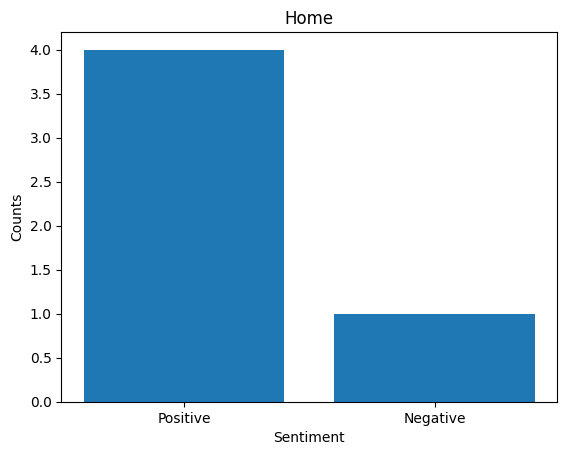

3 2


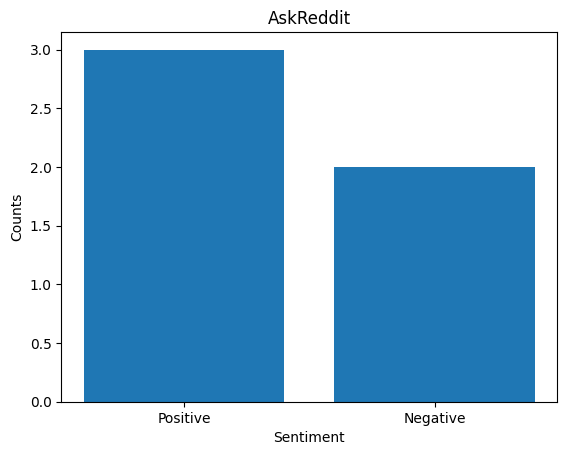

2 3


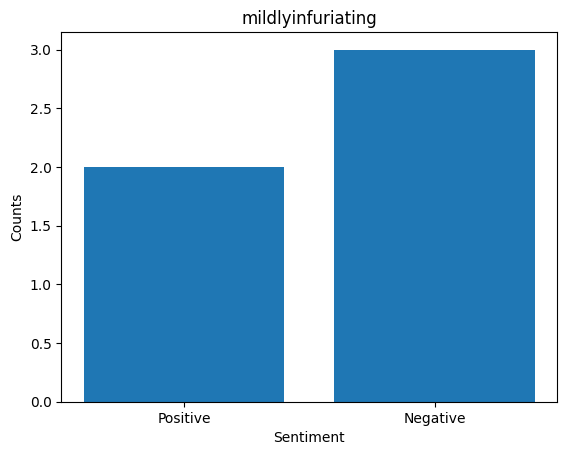

3 2


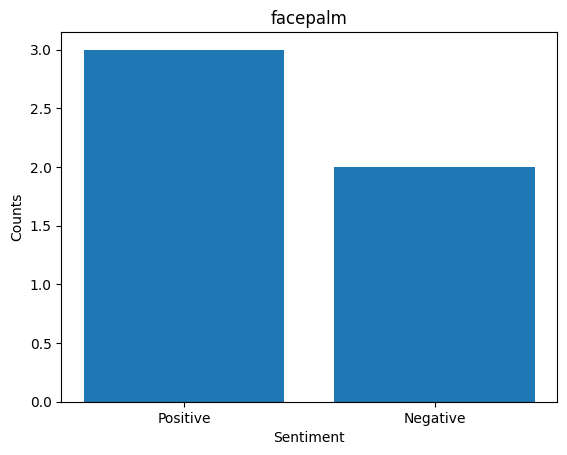

1 4


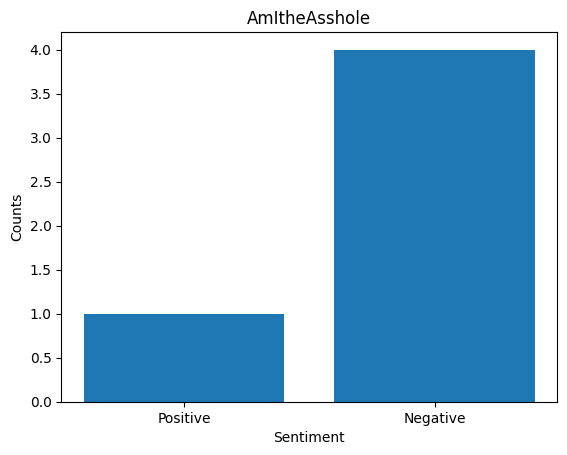

In [ ]:
import matplotlib.pyplot as plt

for i in posts_dict.items():
    
    pos = 0
    neg = 0
    for j in i[1]:
        if predict_sentiment(model,tokenizer_global,j) == 1:
            pos += 1
        else:
            neg += 1
  
    print(pos, neg)
    x = ['Positive','Negative']
    y = [pos, neg]

    fig, ax = plt.subplots()
    ax.bar(x, y)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Counts')
    ax.set_title(i[0])

    plt.show()


In [2]:

import tweepy
import time

# Credentials (INSERT YOUR KEYS AND TOKENS IN THE STRINGS BELOW)
api_key = "k9nd5I1S5ILugYrBYuEwnXvuE"
api_secret = "I7txtHmmkMJwUnPUofbFK7jKfh3MaLkTJwxQER2mA8SWxUOf0H"
bearer_token = r"AAAAAAAAAAAAAAAAAAAAADK4mwEAAAAAZY%2F8R6dawem%2FlKjpaXRrx4qyBTc%3DMo0Rf3n6hvCpVoTOeGogrHnsjdGgHHgwHWIWCFrWKWq9ovIiA8"
access_token = "1650009738959278086-evHOr5qrNNS8CH07CC3EVKc2wZXQMa"
access_token_secret = "mGsapqPdDVM4nxahfUzcTALxpKX0vvvOudWwOJHH5gwpV"


In [7]:
from twython import Twython
twitter = Twython(api_key, api_secret, access_token, access_token_secret)

# Get the trending hashtags for a specific location (here: worldwide)
trends = twitter.get_place_trends(id=23424977)  # 1 for global trends
hashtags = [trend['name'] for trend in trends[0]['trends'] if trend['name'].startswith('#')]


In [8]:
hashtags

['#90DayFianceTheOtherWay',
 '#BadBoysTexas',
 '#FreeClix',
 '#AmericanIdol',
 '#AskSNB']

In [9]:
for hashtag in hashtags:
    search_results = twitter.search(q=hashtag, count=10)
    for tweet in search_results['statuses']:
        print(tweet['text'])
        print("\n")


Jeymi didn't think it through either when she married Kris.  She didn't really know her....and what she did know wa… https://t.co/5iDxIeYfix


Hear her out about what jeymi? She's just going to lie some more. You married a junky #90dayfiancetheotherway


Jeymi and Kris tell two different stories but I still believe more of Jeymi’s story
#90DayFiance… https://t.co/St1aRgSJ9E


I think Jeymi is more mad she doesn't have her money maker there. Why is she not working?! I said it before that sh… https://t.co/bK0pBYnxDK


Oussama deserved to be kicked in the nuts by that donkey. 

#90DayFiance #90DayFianceTheOtherWay #90DayFianceTOW


~sarcasm font~ No SHIT!! Your wife is mad you’ve been gone 5 months without calling regularly. That’s so unexpected… https://t.co/g3B6gVWfkh


Period! Debbie is carrying this entire season. I want Oussama to come to the US, tho. I would love to see him get a… https://t.co/Y3ycHxowm8


Now I have to find out why people don't want to work with someone from Venezu

In [ ]:
username = 'BillGates'
search_results = twitter.get_user_timeline(screen_name=username, count=10, tweet_mode='extended')

for tweet in search_results:
    print(tweet['full_text'])

RT @gatesfoundation: Chickpeas? Garbanzo beans?  
 
No matter what you call these little round legumes, they are one of the best ingredient…
This week in In San Diego, I got to talk with @jessieww about the issues with today’s math curricula—and the promises the future holds. https://t.co/BRxKtpa2pz
For decades, we’ve been fighting back against deadly diseases by expanding access to lifesaving vaccines. Coming out of the pandemic, we’re facing new challenges to #BuildBackImmunity–and past successes have proven that we can overcome these challenges together. https://t.co/PF8Af8zUyl
It’s always great catching up with @jessieww. We chatted about math, edtech, AI, and human ingenuity. Here’s a look at our conversation. https://t.co/oT7pdEXRY4
I had a lot of fun meeting @CheechMarin, experiencing @TheCheechCenter, and learning a lot about his work to support the arts, education, and economic mobility for Mexican Americans. https://t.co/NXOHub9Scd
I am so impressed with Eva Nangalo—it’s hard

In [ ]:
for tweet in search_results:
    print(tweet.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])
dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])
dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id'

In [ ]:
client = tweepy.Client(bearer_token=bearer_token)

# Set up user IDs to lookup
user_ids = ["2244994945", "783214"]

# Perform user lookup and print results
response = client.get_users(ids=user_ids)

for user in response.data:
    print(user["name"], user["username"], user["description"])

In [13]:
from youtubesearchpython.__future__ import VideosSearch

videosSearch = VideosSearch('NoCopyrightSounds', limit = 2)
videosResult = await videosSearch.next()
print(videosResult)

{'result': [{'type': 'video', 'id': 'NVXgPsK_eTw', 'title': 'Top 100 NoCopyRightSounds | Best of NCS | Most Viewed Songs | The Best of All Time | 2022 | 6H', 'publishedTime': '1 year ago', 'duration': '6:09:40', 'viewCount': {'text': '2,398,933 views', 'short': '2.3M views'}, 'thumbnails': [{'url': 'https://i.ytimg.com/vi/NVXgPsK_eTw/hq720.jpg?sqp=-oaymwEcCOgCEMoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLCjw6HccjBlyk5WSf9SsIcpQRO7Ig', 'width': 360, 'height': 202}, {'url': 'https://i.ytimg.com/vi/NVXgPsK_eTw/hq720.jpg?sqp=-oaymwEcCNAFEJQDSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLBw5AXFSQpmz880uheJagb5y9PjpQ', 'width': 720, 'height': 404}], 'richThumbnail': {'url': 'https://i.ytimg.com/an_webp/NVXgPsK_eTw/mqdefault_6s.webp?du=3000&sqp=CJitl6IG&rs=AOn4CLDBsTdZc11wbFJ5P2Y-9iA0XxV6sg', 'width': 320, 'height': 180}, 'descriptionSnippet': [{'text': 'Welcome to Sun NCS☆ ------- ▻Top 100 '}, {'text': 'NoCopyRightSounds', 'bold': True}, {'text': ' | Best of NCS | Most Viewed Songs | The Best of 

In [ ]:
from youtubesearchpython import Hashtag

hashtag = Hashtag('ncs', limit = 1)

print(hashtag.result())

{'result': [{'type': 'video', 'id': 'aVyI3EQb9Ww', 'title': 'Name the track and you win the cookie he dropped 🍪 #nocopyrightsounds #ncs', 'publishedTime': '3 months ago', 'duration': '0:13', 'viewCount': {'text': '408,682 views', 'short': '408K views'}, 'thumbnails': [{'url': 'https://i.ytimg.com/vi/aVyI3EQb9Ww/hq2.jpg?sqp=-oaymwE1CKgBEF5IVfKriqkDKAgBFQAAiEIYAHABwAEG8AEB-AHOBYACgAqKAgwIABABGEAgVihlMA8=&rs=AOn4CLAKU1wcf-mZS9qP_9LiZa2rbuMBgg', 'width': 168, 'height': 94}, {'url': 'https://i.ytimg.com/vi/aVyI3EQb9Ww/hq2.jpg?sqp=-oaymwE1CMQBEG5IVfKriqkDKAgBFQAAiEIYAHABwAEG8AEB-AHOBYACgAqKAgwIABABGEAgVihlMA8=&rs=AOn4CLDjJgX-X0h77K8zxewoRbpgKxNAfg', 'width': 196, 'height': 110}, {'url': 'https://i.ytimg.com/vi/aVyI3EQb9Ww/hq2.jpg?sqp=-oaymwE2CPYBEIoBSFXyq4qpAygIARUAAIhCGABwAcABBvABAfgBzgWAAoAKigIMCAAQARhAIFYoZTAP&rs=AOn4CLC64M7ELVvPUPVEIsaDGnrojApEtw', 'width': 246, 'height': 138}, {'url': 'https://i.ytimg.com/vi/aVyI3EQb9Ww/hq2.jpg?sqp=-oaymwE2CNACELwBSFXyq4qpAygIARUAAIhCGABwAcABBvABAfgBzgW

In [12]:
from youtubesearchpython import *

# You can either pass an ID or a URL
video_id = "aVyI3EQb9Ww"
comments = Comments(video_id)

print(f'Comments Retrieved: {len(comments.comments["result"])}')

while comments.hasMoreComments:
    print('Getting more comments...')
    comments.getNextComments()
    print(f'Comments Retrieved: {len(comments.comments["result"])}')
    for i in (comments.comments["result"]):
        print(i['content'])
    if len(comments.comments["result"]) > 100:
        comments.hasMoreComments = False

print('Found all the comments.')

Comments Retrieved: 20
Getting more comments...
Comments Retrieved: 40
That’s a famous ncs track. Ncs has so many great songs
INVINCIBLE - DEAF KEV, this song is my childhood, all the youtube tutorials and intros, ahhh, memories
Nostalgia, such vivid memories. I have no idea how I stumbled on NCS channel initially but I’ve been addicted to it from the first video. I love how so many artists trust them now for publicity, I can hardly ever get a song I don’t like from NCS. This channel is truly INVINCIBLE.
DEAF KEV-INVINCIBLE     this song is definitely INVINCIBLE!!
legend never die !
DEAF KEV - Invincible, an all time legendary song
Invincible was the frist outro song I used on my YouTube channel! Brings back so many memories!
Invincible! I would always listen to this song when gaming
Deaf Kev , Invicinble, too many years of NCS made me remember this banger.
i listened to thousands of hours of ncs, I looked at the green circle and background and immediately knew this was invincible xD
H

In [ ]:
from youtubesearchpython import *

# You can either pass an ID or a URL
video_id = "aVyI3EQb9Ww"
comments = Comments.get(video_id)

print(comments)

{'result': [{'id': 'Ugwyb6f67Ai57BI67514AaABAg', 'author': {'id': 'UCGDCFFLJ4I6OY7d7PSf5YaA', 'name': 'Chris H', 'thumbnails': [{'url': 'https://yt3.ggpht.com/ytc/AGIKgqMSpWLHxl1WMA7eNki36ry9HkmsiL8MKU7I0MPD=s48-c-k-c0x00ffffff-no-rj', 'width': 48, 'height': 48}, {'url': 'https://yt3.ggpht.com/ytc/AGIKgqMSpWLHxl1WMA7eNki36ry9HkmsiL8MKU7I0MPD=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, {'url': 'https://yt3.ggpht.com/ytc/AGIKgqMSpWLHxl1WMA7eNki36ry9HkmsiL8MKU7I0MPD=s176-c-k-c0x00ffffff-no-rj', 'width': 176, 'height': 176}]}, 'content': 'That’s a famous ncs track. Ncs has so many great songs', 'published': '3 months ago', 'isLiked': False, 'authorIsChannelOwner': False, 'voteStatus': 'INDIFFERENT', 'votes': {'simpleText': '1.2K', 'label': '1.2K likes'}, 'replyCount': 12}, {'id': 'UgzeyvAjIgflFz5GDCN4AaABAg', 'author': {'id': 'UCA5Fj73W2pcPPAaYRuBlFig', 'name': 'Music Drone', 'thumbnails': [{'url': 'https://yt3.ggpht.com/IiFYutDGhqmfDd1Sw2aOzVpfZFvx6uMnJ0iUWUzfkurQks_gJxankxq0j